# Inputs for the Farmer Module

This notebook shows inputs applicable for the Farmer Module, now for the Nira river sub-basin of the Upper Bhima basin.

These are the results of CWatM simulations:
 - https://cwatm.iiasa.ac.at/
 - https://github.com/CWatM/CWatM

In [1]:
from netCDF4 import Dataset, num2date
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
from PIL import Image
import datetime

In [2]:
fuse_folder_local = 'C:/FUSE'
cwatm_folder_local = fuse_folder_local + '/CWATM'

fuse_folder_github = 'C:/GitHub/FUSE'
photo_folder = fuse_folder_github + '/Images'

output_folder = cwatm_folder_local + '/Output' #_2019_Dec_11_1961_2010'

## Introduction

We are currently interested in 
 - Reference evapotranspiration, segment and month-specific averages
 - Rainfall, segment and month-specific averages
 - Crop-specific area
 - Crop-specific relative yield
 - Reservoir volumes
 - Groundwater depths

## Spatial Unit: Segments

The smallest administrative unit with available data for the region is called the Taluka. Here, the Taluka is further divided into that within and that outside of the Veer comand area.

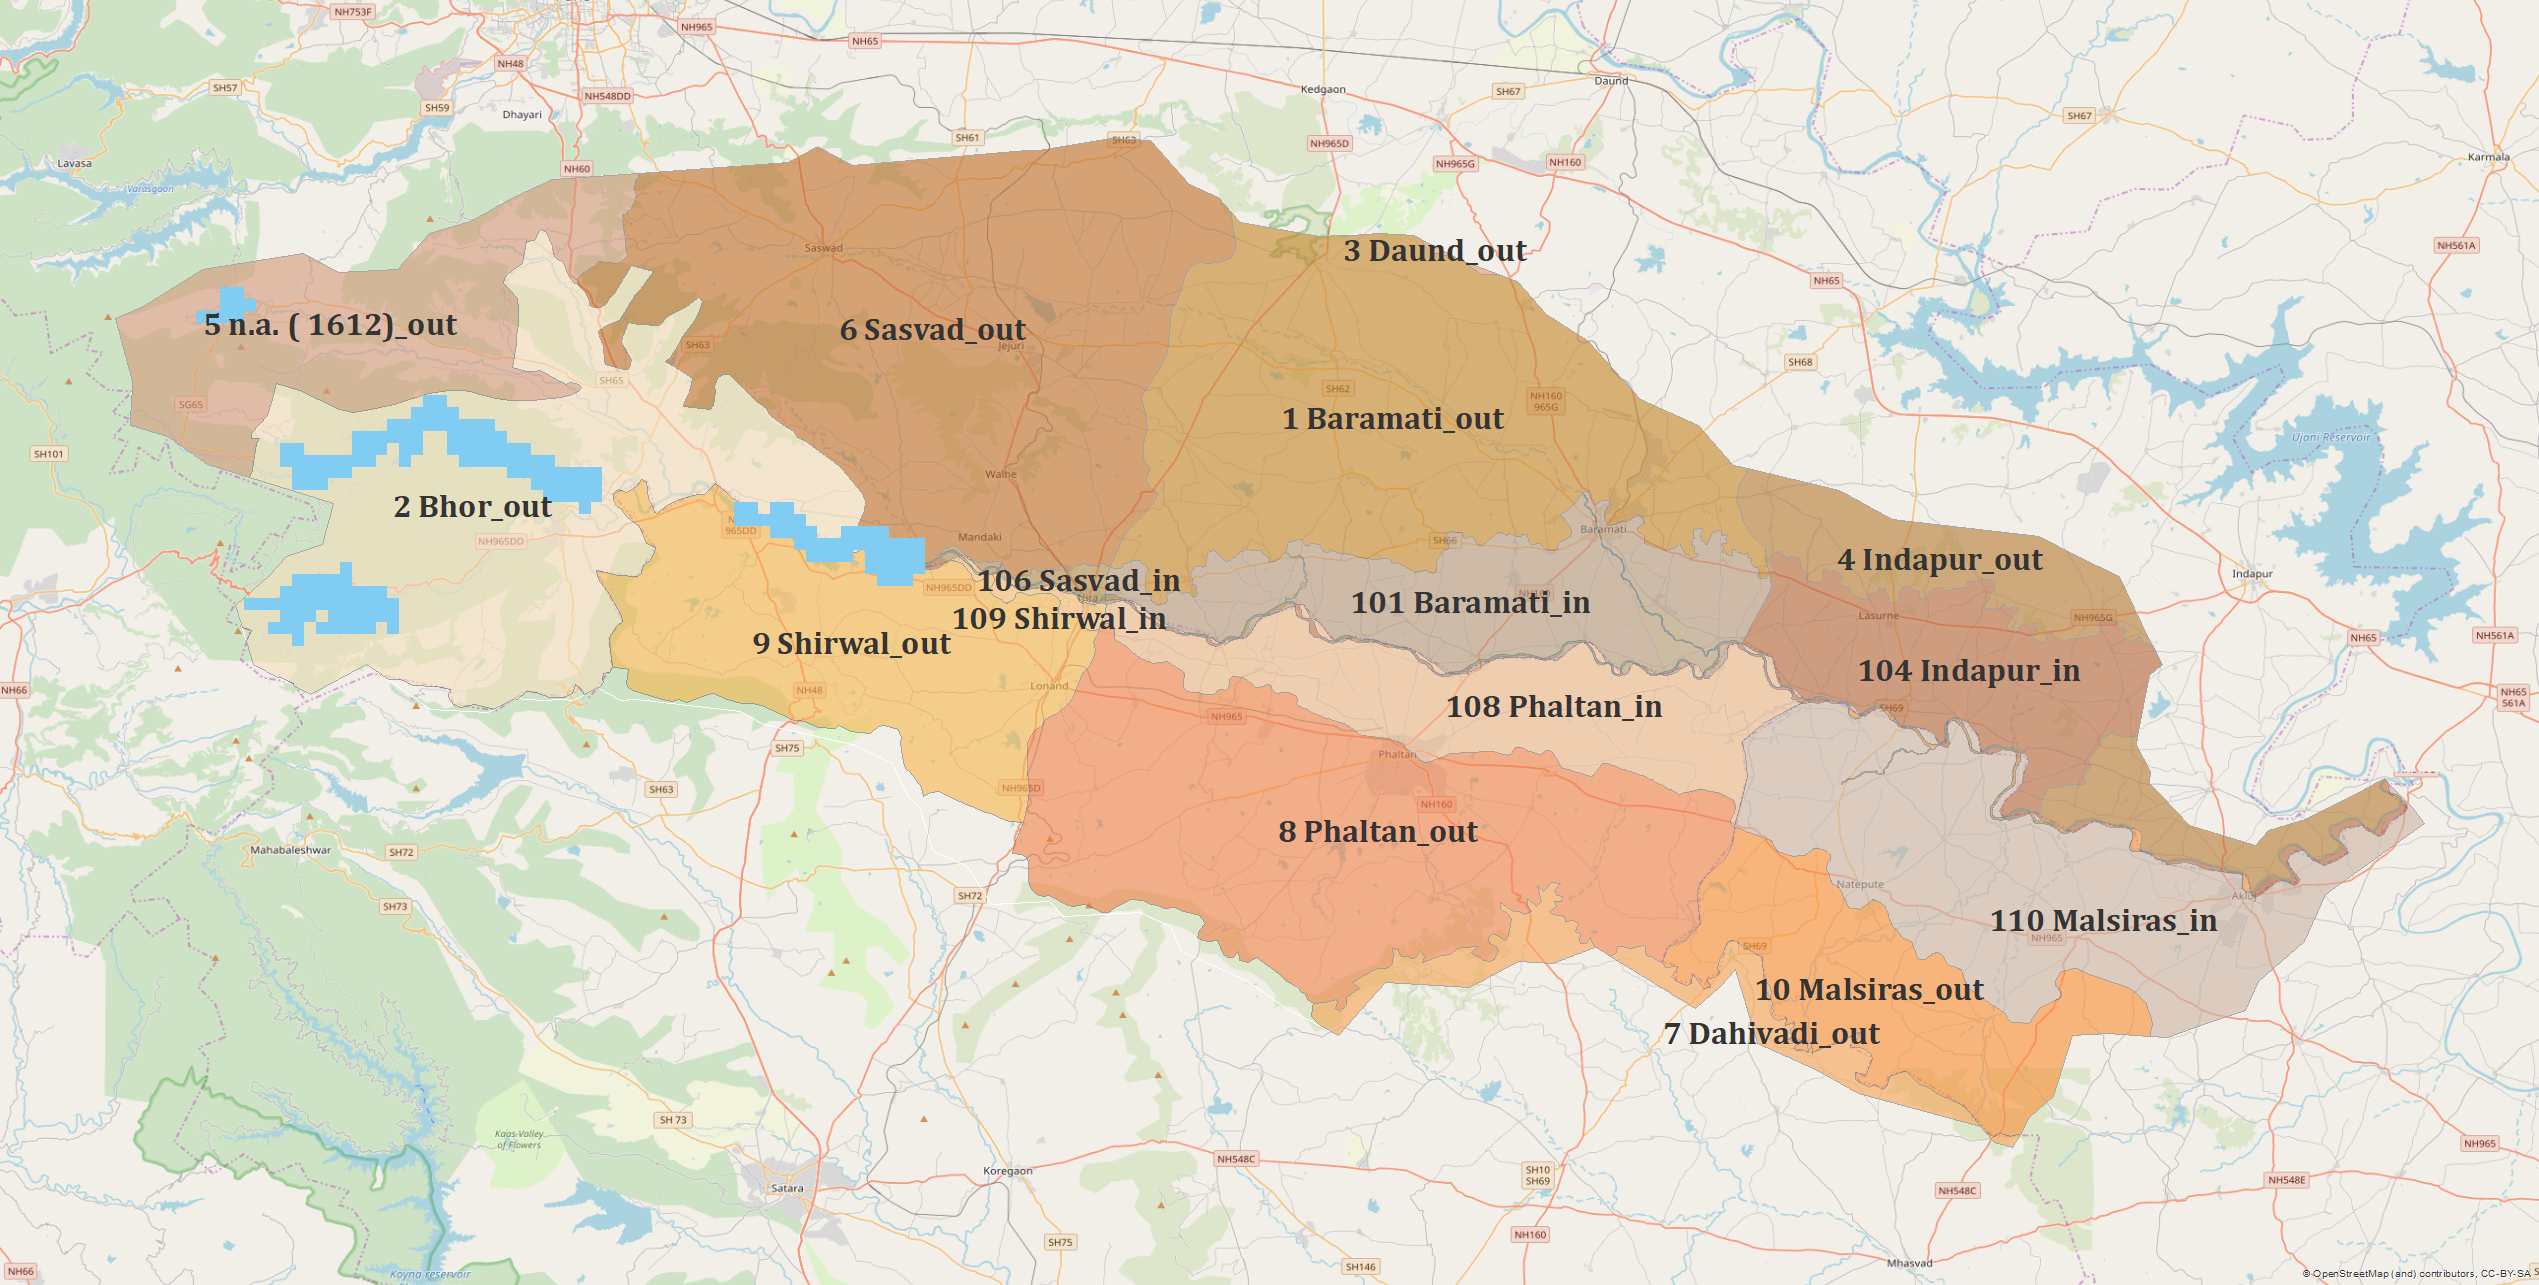

In [3]:
img = Image.open(photo_folder + '/admin_segments_Sarati.tif')
img

In [4]:
admin_segments_file = output_folder + "/adminSegments_daily.nc"
nc_admin_segments = Dataset(admin_segments_file, 'r')
admin_segments = nc_admin_segments.variables['adminSegments'][0,:,:]

The data above holds the monthly average value (ETRef, Rain, etc.) for each administrative unit in each cell of the administrative unit. 

The following code chooses a representative cell for each administrative unit.

In [5]:
Segment_reps = []

for i in range(nc_admin_segments.variables['lat'].shape[0]):
    for j in range (nc_admin_segments.variables['lon'].shape[0]):
        
        if admin_segments[i,j]>0 and admin_segments[i,j] not in [i[0] for i in Segment_reps]:       
            Segment_reps.append([int(admin_segments[i,j]), i, j])

Segment_reps.sort()

#for i in Segment_reps:
#    print('Segment ' +str(i[0])+ ', lat ' +str(i[1])+ ', lon ' +str(i[2]))

In [6]:
ETRef_monAvg_segments_file = output_folder + "/ETRefAverage_segments_monthavg.nc"
rain_monAvg_segments_file = output_folder + "/rainAverage_segments_monthavg.nc"

nc_ETRef_monAvg_segments = Dataset(ETRef_monAvg_segments_file, 'r')
nc_rain_monAvg_segments = Dataset(rain_monAvg_segments_file, 'r')

ETRef_monAvg_segments = nc_ETRef_monAvg_segments.variables['ETRefAverage_segments_monthavg'][:,:,:]
rain_monAvg_segments = nc_rain_monAvg_segments.variables['rainAverage_segments_monthavg'][:,:,:]

#print(nc_ETRef_monAvg_segments.variables['time'].units)

times = nc_ETRef_monAvg_segments.variables['time'][:]
Dates_simulated = [datetime.datetime(1900,1,1)+datetime.timedelta(seconds = 365.25/12*24.0*3600.0*float(val)) for val in times]



In [7]:
ETRef_monAvg_representative = []
rain_monAvg_representative= []

for seg in Segment_reps:
    
    ETRef_monAvg_representative.append([seg[0]])
    rain_monAvg_representative.append([seg[0]])
    
    for t in range(nc_ETRef_monAvg_segments.variables['time'].shape[0]):
        ETRef_monAvg_representative[-1].append(ETRef_monAvg_segments[t, seg[1], seg[2]])
        rain_monAvg_representative[-1].append(rain_monAvg_segments[t, seg[1], seg[2]])
        

## Rainfall

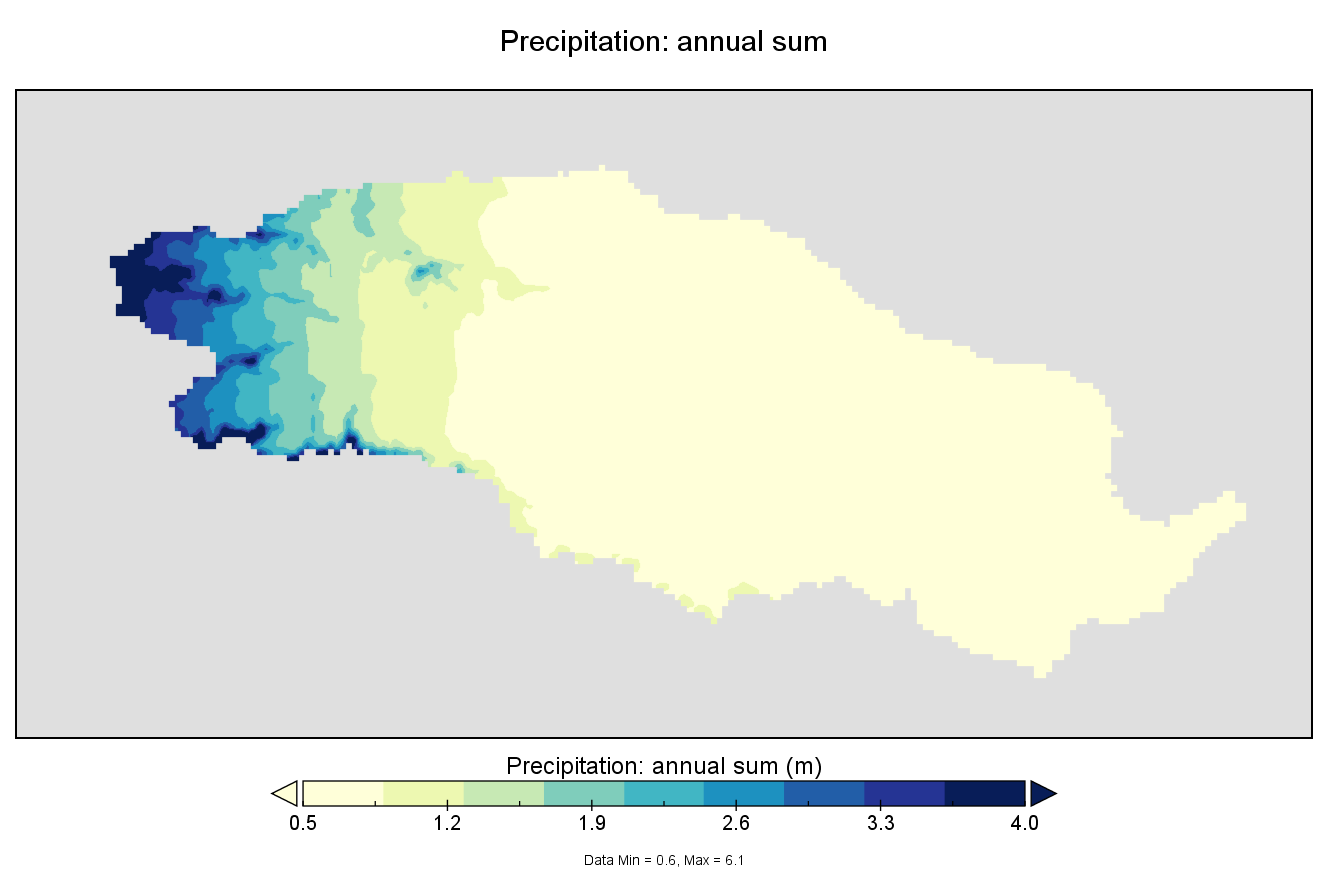

In [8]:
img = Image.open(photo_folder + '/sum_precipitation_annualtot.png')    # Open image as PIL image object
img


In [9]:
fig = go.Figure()
    
for i in rain_monAvg_representative:
    fig.add_trace(go.Scatter(y=i[1:],
                             x = Dates_simulated,
                             mode='lines',
                             name=i[0]))


fig.update_layout(title='Rainfall, averaged over segment and month',
                       xaxis_title='Month',
                       yaxis_title='Monthly Average Rainfall (m/day)')

fig.show()

The following output may allow for easier input into Excel.

In [10]:
for seg in rain_monAvg_representative:
    print(*seg, sep = ", ")

1, 0.0009633842, 0.0, 0.00016792867, 0.000101379635, 0.0018380329, 0.0019941712, 0.002947949, 0.0005774645, 0.0052006245, 0.0051654936, 0.00013290808, 0.0, 0.0, 0.0, 0.0, 2.1710257e-05, 0.00018537597, 0.0040076245, 0.003918598, 0.0016088366, 0.0056535522, 0.009205811, 0.00020531235, 4.6745512e-07, 6.511481e-05, 0.0, 2.420887e-05, 0.0001666726, 0.00016535813, 0.0050778557, 0.0020905703, 0.0027123126, 0.0039142263, 0.0013251441, 0.0024134975, 0.0010594084, 0.0, 0.0, 0.0, 9.871475e-05, 0.0014679529, 0.0042625163, 0.004692542, 0.0027009775, 0.0068023875, 0.0052484786, 0.00067192706, 0.0, 0.0, 1.703318e-06, 0.0, 7.300436e-07, 0.0012080844, 0.0030063153, 0.0036468636, 0.00066603476, 0.0056283316, 0.006609028, 0.0, 1.7591555e-07, 0.0, 0.0, 2.0636804e-05, 6.3531894e-05, 0.0011811965, 0.00273008, 0.0022997295, 0.002870006, 0.0029352123, 0.002507116, 0.0003181649, 2.0977403e-05, 2.4450157e-05, 0.0, 0.0, 0.000109928005, 0.00075490057, 0.0011930026, 0.0016025736, 0.0023550203, 0.005284694, 0.00335

6, 0.00055812235, 0.0, 4.072585e-05, 0.0003942068, 0.0021016216, 0.0014807233, 0.010290873, 0.0013199719, 0.008086123, 0.0061552003, 5.7862027e-05, 0.0, 0.0, 0.0, 0.0, 0.0001548736, 0.000121748344, 0.0067976043, 0.011181464, 0.0025831093, 0.0041411784, 0.008127515, 0.00046642724, 1.17511e-05, 4.5245556e-06, 0.0, 3.7089328e-07, 0.0006581776, 8.591243e-05, 0.008248356, 0.0072610495, 0.00917265, 0.0016966687, 0.0012462984, 0.0017986103, 0.0011552523, 0.0, 0.0, 0.0, 6.372199e-05, 0.0016604967, 0.005279907, 0.007900976, 0.0046206242, 0.004831446, 0.0061770906, 0.0008743812, 0.0, 0.0, 4.815346e-06, 0.0, 1.7735356e-05, 0.0013527964, 0.0069699213, 0.008375348, 0.0022094334, 0.005417336, 0.00752995, 0.0, 5.332208e-06, 0.0, 0.0, 5.86841e-05, 0.00036195913, 0.0012351581, 0.0044752583, 0.005022286, 0.0031908222, 0.003051769, 0.0037211077, 0.00042902428, 0.00013275568, 0.0002839148, 0.0, 0.0, 0.00036695786, 0.0010164152, 0.003002893, 0.0054680803, 0.0027133855, 0.0062378924, 0.0031438118, 0.0005531

101, 0.0011002123, 0.0, 0.0002150623, 0.00011679768, 0.0015889651, 0.0020050267, 0.0025414685, 0.00060213404, 0.0048218966, 0.004592893, 0.00012370839, 0.0, 0.0, 0.0, 0.0, 8.56761e-07, 0.00018252806, 0.0034754472, 0.003362102, 0.001858339, 0.0054599047, 0.009807077, 0.00012747187, 5.883478e-07, 0.00016682128, 0.0, 2.8447364e-06, 0.00018412563, 0.0001584796, 0.0042197304, 0.0020992323, 0.0024482505, 0.0042778854, 0.0015582981, 0.0022188239, 0.0011872896, 0.0, 0.0, 0.0, 0.0001180759, 0.0011203516, 0.0039199744, 0.004566433, 0.0034750137, 0.007213869, 0.005672775, 0.0004809135, 0.0, 0.0, 5.6276526e-06, 0.0, 4.0948268e-07, 0.0015477136, 0.0036656351, 0.0041066688, 0.00066085113, 0.006214805, 0.0067146174, 0.0, 1.5552508e-10, 0.0, 0.0, 1.692732e-05, 4.7249694e-05, 0.0012800945, 0.0025401772, 0.0024386737, 0.0029325923, 0.00364157, 0.0026019828, 0.00019154862, 1.60287e-05, 6.3046005e-05, 0.0, 0.0, 5.928017e-05, 0.00074169255, 0.0010905748, 0.0015972973, 0.0022501082, 0.0048821922, 0.00312552

## Reference Evapotranspiration

Amounts are given in metres [m]

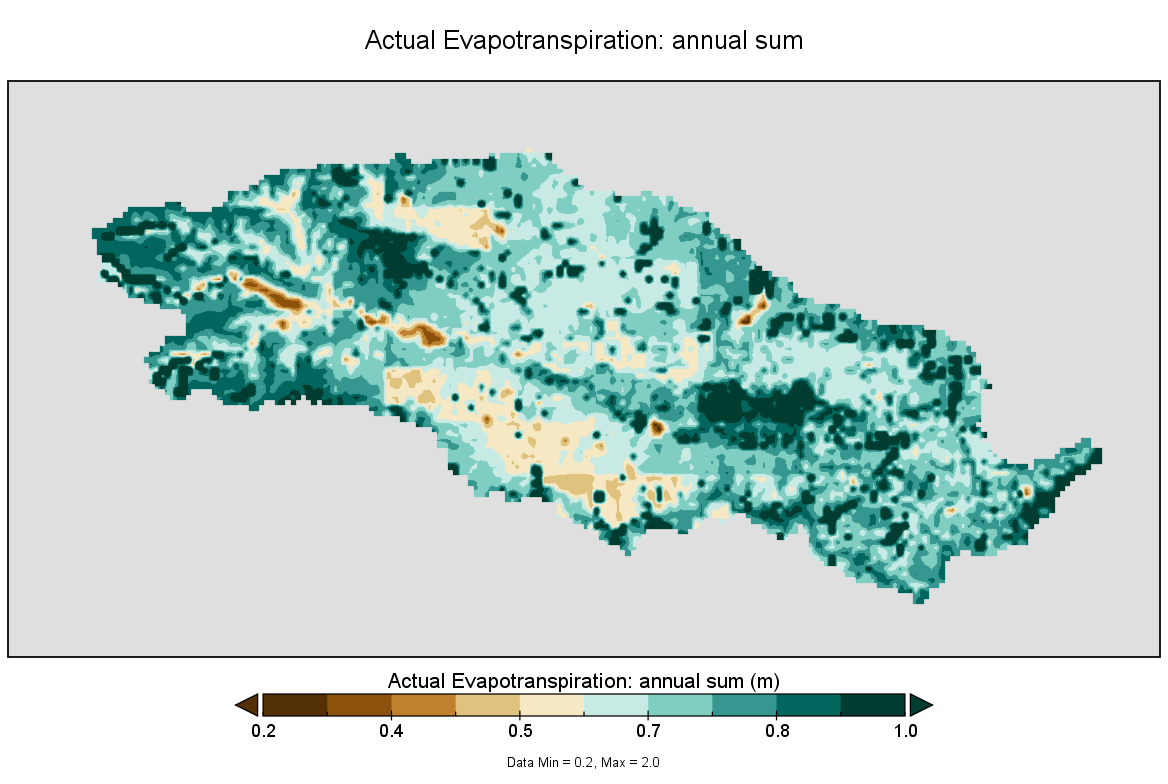

In [11]:
img = Image.open(photo_folder + '/sum_actualET_annualtot.png')
img

In [12]:
fig = go.Figure()

for i in ETRef_monAvg_representative:
    fig.add_trace(go.Scatter(y=i[1:],
                    x = Dates_simulated,
                    mode='lines',
                    name=i[0]))


fig.update_layout(title='Reference Evapotranspiration, averaged over segment and month',
                       xaxis_title='Month',
                       yaxis_title='Monthly Average Reference ET (m/day)')

fig.show()

The following output may allow for easier input into Excel.

In [13]:
for seg in ETRef_monAvg_representative:
    print(*seg, sep = ", ")

1, 0.0037615306, 0.0048621176, 0.005720137, 0.0064993636, 0.006661331, 0.0052898466, 0.0035912998, 0.0032302258, 0.0040068734, 0.0040913615, 0.0035887412, 0.0036999956, 0.003969136, 0.0048508295, 0.0060298773, 0.0067763804, 0.0073502236, 0.0049537607, 0.0034545686, 0.0030337179, 0.0039456803, 0.004140367, 0.003912994, 0.0038546536, 0.0036899403, 0.004586365, 0.005927686, 0.006244974, 0.0071486724, 0.004654902, 0.003754912, 0.003407006, 0.003930215, 0.0042574215, 0.0036965914, 0.0031462065, 0.0038251546, 0.004938415, 0.0059219426, 0.007129502, 0.007112725, 0.0050598816, 0.0034660823, 0.0030637905, 0.0036372922, 0.0041651, 0.0036644558, 0.0036864136, 0.0036316449, 0.0048691705, 0.0061187544, 0.0071258848, 0.006648414, 0.004650776, 0.0034119904, 0.0032197675, 0.0036286304, 0.0043251603, 0.0042043435, 0.003746645, 0.004088467, 0.004658662, 0.0057536336, 0.007070421, 0.0067245895, 0.004528258, 0.003478227, 0.00322452, 0.00418568, 0.004315609, 0.0039479053, 0.003953205, 0.003913637, 0.004652

108, 0.003837232, 0.00502307, 0.0058324835, 0.0066608116, 0.0068476917, 0.0056441836, 0.003934051, 0.003497968, 0.004193656, 0.004234549, 0.0037164872, 0.0038010671, 0.0040998245, 0.005043069, 0.0062029306, 0.006968282, 0.007596634, 0.0052648247, 0.0037729975, 0.0032884213, 0.0041410667, 0.004299688, 0.004039125, 0.0039543817, 0.0038108702, 0.004736286, 0.0060911337, 0.0064411666, 0.007366349, 0.004963672, 0.0041103144, 0.0037027362, 0.004105731, 0.0043831537, 0.0037984285, 0.0032028109, 0.003947998, 0.005107547, 0.0061138337, 0.007333341, 0.007363839, 0.005390586, 0.003770971, 0.0032829316, 0.0038507397, 0.004242958, 0.0037896198, 0.0037716113, 0.0037630342, 0.0050296057, 0.0062959655, 0.0073800823, 0.00691257, 0.0049820077, 0.003766096, 0.0034714958, 0.0038085992, 0.0044307853, 0.004324085, 0.0038421904, 0.004229649, 0.0048191426, 0.005915689, 0.007287632, 0.0069665476, 0.0048411046, 0.0037773873, 0.00350244, 0.004359839, 0.0044854246, 0.0041202926, 0.0040662247, 0.004048707, 0.00482

In [14]:
sugarAdsali_segments_file = output_folder + "/areaCrops_Irr_segment[1]_daily.nc"
sugarPreSeasonal_segments_file = output_folder + "/areaCrops_Irr_segment[2]_daily.nc"
sugarSuru_segments_file = output_folder + "/areaCrops_Irr_segment[3]_daily.nc"
sorghum_segments_file = output_folder + "/areaCrops_Irr_segment[4]_daily.nc"

nc_sugarAdsali_segments = Dataset(sugarAdsali_segments_file, 'r')
nc_sugarPreSeasonal_segments = Dataset(sugarPreSeasonal_segments_file, 'r')
nc_sugarSuru_segments = Dataset(sugarSuru_segments_file, 'r')
nc_sorghum_segments = Dataset(sorghum_segments_file, 'r')

sugarAdsali_segments = nc_sugarAdsali_segments.variables['areaCrops_Irr_segment[1]'][0,:,:]
sugarPreSeasonal_segments = nc_sugarPreSeasonal_segments.variables['areaCrops_Irr_segment[2]'][0,:,:]
sugarSuru_segments = nc_sugarSuru_segments.variables['areaCrops_Irr_segment[3]'][0,:,:]
sorghum_segments = nc_sorghum_segments.variables['areaCrops_Irr_segment[4]'][0,:,:]

In [15]:
sugarAdsali_representative = []
sugarPreSeasonal_representative = []
sugarSuru_representative = []
sorghum_representative = []

for seg in Segment_reps:
    
    sugarAdsali_representative.append([seg[0], sugarAdsali_segments[seg[1], seg[2]]])
    sugarPreSeasonal_representative.append([seg[0], sugarPreSeasonal_segments[seg[1], seg[2]]])
    sugarSuru_representative.append([seg[0], sugarSuru_segments[seg[1], seg[2]]])
    sorghum_representative.append([seg[0], sorghum_segments[seg[1], seg[2]]])

## Crop-specific  areas

Units are given in m2.

In [16]:
sugarAdsali = np.array([i[1] for i in sugarAdsali_representative])
sugarPreSeasonal = np.array([i[1] for i in sugarAdsali_representative])
sugarSuru = np.array([i[1] for i in sugarSuru_representative])
sorghum = [i[1] for i in sorghum_representative]

Crop = [sugarAdsali, sugarPreSeasonal, sugarSuru, sorghum]

Crop_name = ['Sugarcane, variety Adsali', 'Sugarcane, variety Pre-Seasonal', 'Sugarcane, variety Suru', 'Sorghum']

fig = go.Figure()
x=['s'+str(i[0]) for i in sugarAdsali_representative]

for c in range(len(Crop)):
        fig.add_trace(go.Bar(x = x, 
                             y = Crop[c],
                             name = Crop_name[c]))

fig.update_layout(title='Crop areas',
                  xaxis_title='Segment',
                  yaxis_title='Area (m2)', 
                  barmode='stack')

fig.show()

The following output may allow for easier input into Excel.

In [17]:
for i in range(len(Segment_reps)):
    print(str(sugarAdsali_representative[i][0]) + ', '+ str(sugarAdsali_representative[i][1]) + ', ' + str(sugarPreSeasonal_representative[i][1]) + ', ' + str(sugarSuru_representative[i][1]) + ', ' + str(sorghum_representative[i][1]))

1, 7398326.0, 20507428.0, 7810933.0, 37306910.0
2, 8928162.0, 24547600.0, 7891208.5, 11802677.0
3, 7211.4707, 8749.339, 3127.634, 6430.7476
4, 3856967.0, 11075507.0, 5159695.5, 60302720.0
5, 4290064.5, 11809850.0, 3894564.0, 7244894.5
6, 12850549.0, 36198190.0, 13165909.0, 37408524.0
7, 997894.5, 2743766.8, 983401.44, 152010.5
8, 8591854.0, 23987994.0, 8931055.0, 25231600.0
9, 5200022.0, 14351692.0, 4688807.5, 5700084.5
10, 3656096.8, 10089222.0, 4176961.5, 19532572.0
101, 8577042.0, 25597036.0, 14022638.0, 176275730.0
104, 6164584.0, 18364044.0, 10719324.0, 161501580.0
106, 292202.0, 864091.5, 310614.88, 2359655.0
108, 9067185.0, 27111428.0, 14915146.0, 122440344.0
109, 310060.25, 913120.75, 366570.9, 809670.8
110, 17674034.0, 52390990.0, 31581992.0, 286415500.0


In [18]:
PETTotVol_sugarAdsali_segments_file = output_folder + "/PET_Sugar1_segments_monthtot.nc"
PETTotVol_sugarPreSeasonal_segments_file = output_folder + "/PET_Sugar2_segments_monthtot.nc"
PETTotVol_sugarSuru_segments_file = output_folder + "/PET_Sugar3_segments_monthtot.nc"
PETTotVol_sorghum_segments_file = output_folder + "/PET_Sorghum_segments_monthtot.nc"

nc_PETTotVol_sugarAdsali_segments = Dataset(PETTotVol_sugarAdsali_segments_file, 'r')
nc_PETTotVol_sugarPreSeasonal_segments = Dataset(PETTotVol_sugarPreSeasonal_segments_file, 'r')
nc_PETTotVol_sugarSuru_segments = Dataset(PETTotVol_sugarSuru_segments_file, 'r')
nc_PETTotVol_sorghum_segments = Dataset(PETTotVol_sorghum_segments_file, 'r')

PETTotVol_sugarAdsali_segments = nc_PETTotVol_sugarAdsali_segments.variables['PET_Sugar1_segments_monthtot'][:,:,:]
PETTotVol_sugarPreSeasonal_segments = nc_PETTotVol_sugarPreSeasonal_segments.variables['PET_Sugar2_segments_monthtot'][:,:,:]
PETTotVol_sugarSuru_segments = nc_PETTotVol_sugarSuru_segments.variables['PET_Sugar3_segments_monthtot'][:,:,:]
PETTotVol_sorghum_segments = nc_PETTotVol_sorghum_segments.variables['PET_Sorghum_segments_monthtot'][:,:,:]

PETTotVol_sugarAdsali_representative = []
PETTotVol_sugarPreSeasonal_representative = []
PETTotVol_sugarSuru_representative = []
PETTotVol_sorghum_representative = []

for seg in Segment_reps:
    
    PETTotVol_sugarAdsali_representative.append([seg[0]])
    PETTotVol_sugarPreSeasonal_representative.append([seg[0]])
    PETTotVol_sugarSuru_representative.append([seg[0]])
    PETTotVol_sorghum_representative.append([seg[0]])
    
    for t in range(nc_ETRef_monAvg_segments.variables['time'].shape[0]):
        
        PETTotVol_sugarAdsali_representative[-1].append(PETTotVol_sugarAdsali_segments[t, seg[1], seg[2]])
        PETTotVol_sugarPreSeasonal_representative[-1].append(PETTotVol_sugarPreSeasonal_segments[t, seg[1], seg[2]])
        PETTotVol_sugarSuru_representative[-1].append(PETTotVol_sugarSuru_segments[t, seg[1], seg[2]])
        PETTotVol_sorghum_representative[-1].append(PETTotVol_sorghum_segments[t, seg[1], seg[2]])
    


## Potential evapotranspiration: Crop- and segment-specific 

Units are in m per month

In [19]:
Crop_name = ['Sugarcane, variety Adsali', 'Sugarcane, variety Pre-Seasonal', 'Sugarcane, variety Suru', 'Sorghum']

Crop = [PETTotVol_sugarAdsali_representative, PETTotVol_sugarPreSeasonal_representative, 
        PETTotVol_sugarSuru_representative, PETTotVol_sorghum_representative]

for c in range(len(Crop)):
    fig = go.Figure()

    for i in Crop[c]:
        fig.add_trace(go.Scatter(y=i[1:],
                                 x = Dates_simulated,
                                 mode='lines',
                                 name=i[0]))

    fig.update_layout(title='Monthly Total Potential ET: '+ Crop_name[c],
                       xaxis_title='Month',
                       yaxis_title='Potential ET (m3/month)')

    fig.show()

The following outputs may allow for easier input into Excel.

In [20]:
for c in range(len(Crop)):
    print(Crop_name[c])
    for seg in Crop[c]:
        print(*seg, sep = ", ")
    print('\n')

Sugarcane, variety Adsali
1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5728526, 0.4027499, 0.72555214, 0.86121416, 0.9071158, 1.2042384, 1.2839391, 1.3786718, 1.5769048, 2.0918968, 2.2763612, 2.5551996, 1.6727427, 1.2117068, 0.63966453, 0.7980633, 0.8620658, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5034889, 0.4211011, 0.76428443, 0.84747714, 0.94482464, 1.2389531, 1.0888653, 1.330017, 1.5509516, 2.0591133, 2.3947864, 2.4712582, 1.7096635, 1.2153087, 0.6442383, 0.7368469, 0.86386853, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5031742, 0.38350227, 0.7226911, 0.78384864, 0.9583152, 1.4100044, 1.2998956, 1.421091, 1.5144162, 1.9980348, 2.3758323, 2.3390608, 1.530716, 1.2174354, 0.6783309, 0.8447274, 0.898421, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5449872, 0.36018977, 0.71253926, 0.91533166, 0.9487427, 1.4489341, 1.2855676, 1.3866099, 1.5379343, 2.0864286, 2.3676686, 2.6024015, 1.597661, 1.4246815, 0.6617815, 0.88955986, 1.0287484, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.53263986, 0.3890863, 0.7873697, 0.87654173, 0.86

104, 0.0, 0.0, 0.0, 0.0, 0.0, 0.973028, 0.7120382, 1.3182725, 1.3472285, 1.3796853, 1.8957015, 2.0490339, 2.1828885, 2.5057456, 3.271351, 3.57377, 4.1143923, 2.798981, 2.1536658, 1.1489211, 1.2756128, 1.3368579, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.85168964, 0.74694675, 1.3539977, 1.363817, 1.4648148, 1.9003611, 1.6955581, 2.1310973, 2.4834836, 3.296334, 3.764776, 3.9509132, 2.8758311, 2.1568651, 1.1229743, 1.2022324, 1.2939163, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8478354, 0.69443244, 1.2746732, 1.2816436, 1.4529052, 2.2110054, 2.0647912, 2.2590692, 2.3971255, 3.146843, 3.7501915, 3.799857, 2.553513, 2.1162987, 1.1924117, 1.319169, 1.3846326, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9271953, 0.68787736, 1.3164121, 1.4693583, 1.4721955, 2.3102179, 2.066822, 2.2027526, 2.3907642, 3.320232, 3.7351959, 4.147975, 2.7022672, 2.5541291, 1.1874503, 1.4276015, 1.6254046, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9128537, 0.70797336, 1.3916296, 1.4739901, 1.3772243, 2.3226943, 2.1303916, 2.2108274, 2.44

4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.2692908, 2.2637002, 2.4326646, 2.581919, 4.636264, 6.0467196, 6.5979805, 7.6395273, 5.2357535, 4.0095706, 3.5631664, 3.9075608, 2.4609747, 2.2904382, 2.3496788, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.352501, 2.2282221, 1.9970425, 2.52071, 4.58068, 6.108046, 6.9673195, 7.3396716, 5.3697534, 4.0281324, 3.4769385, 3.6913807, 2.3742545, 2.145501, 2.2433145, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.3311061, 2.606051, 2.434579, 2.6636672, 4.408364, 5.8079658, 6.939414, 7.070882, 4.700413, 3.8894446, 3.6978776, 4.0242424, 2.5547082, 2.3390925, 2.3969395, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.3564208, 2.7251945, 2.4406066, 2.5942082, 4.383416, 6.1415606, 6.9024267, 7.689655, 5.0260434, 4.7877383, 3.6732063, 4.366644, 3.0010343, 2.5156138, 2.2716856, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.2832398, 2.7458549, 2.5162845, 2.607272, 4.5063868, 6.3692856, 7.1909223, 7.3021245, 5.1911335, 4.043205, 4.074338, 3.9281816, 2

109, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.09203633, 0.15540826, 0.15939151, 0.17434983, 0.31406105, 0.41779456, 0.4500133, 0.4929454, 0.31652787, 0.21437815, 0.18256605, 0.25165945, 0.17079335, 0.15637083, 0.15280543, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.09514661, 0.16059454, 0.13655941, 0.16563378, 0.3013668, 0.40012923, 0.47363687, 0.48499084, 0.32012427, 0.2137823, 0.187095, 0.22806624, 0.17498441, 0.14618962, 0.14667718, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.09676032, 0.17890042, 0.15875857, 0.17806953, 0.29581544, 0.39468032, 0.46906134, 0.44587615, 0.2845614, 0.22208975, 0.20152941, 0.2740861, 0.1785109, 0.15601827, 0.1565073, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.09451435, 0.17960475, 0.15634929, 0.17152514, 0.3086142, 0.4092628, 0.46996284, 0.5056162, 0.29625732, 0.2539297, 0.19241185, 0.281933, 0.2014813, 0.16620563, 0.14809373, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.083966315, 0.17771615, 0.16292287, 0.17521809, 0.31302017, 0.4340

10, 0.41318065, 1.0064145, 1.2802874, 2.207833, 2.4087734, 2.0369146, 1.4735744, 1.3365757, 1.4086354, 1.4434787, 0.7534142, 0.8052303, 0.45685232, 1.0621024, 1.3803122, 2.358666, 2.7255034, 1.8683243, 1.4180251, 1.2415321, 1.3961886, 1.4880421, 0.8162754, 0.8464467, 0.42184314, 0.9533245, 1.3539999, 2.177381, 2.6106236, 1.7747234, 1.5293219, 1.379967, 1.3965361, 1.500312, 0.74691164, 0.6623572, 0.4422965, 1.0333165, 1.3856839, 2.4883115, 2.630173, 1.9214628, 1.4177424, 1.2215118, 1.3176073, 1.4220814, 0.7636333, 0.796265, 0.42303744, 1.0081966, 1.3976337, 2.5503, 2.5082953, 1.7650063, 1.4235128, 1.2907535, 1.2968472, 1.4911449, 0.86412525, 0.8112268, 0.47254443, 1.0023229, 1.3183146, 2.480008, 2.5240366, 1.7004474, 1.3721224, 1.3079224, 1.4384655, 1.5355388, 0.8415662, 0.8593261, 0.44925055, 0.9728362, 1.397265, 2.3786619, 2.8221087, 1.9245934, 1.4058368, 1.3307086, 1.5226487, 1.5319546, 0.912201, 0.8084106, 0.46225768, 0.99961007, 1.3993441, 2.4857268, 2.7640402, 1.7953851, 1.6746424

9, 0.7140764, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.98483425, 1.1081055, 1.4141276, 0.7365908, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9698524, 1.1867638, 1.4440815, 0.6957438, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.019322, 1.1451969, 1.210807, 0.69933695, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.99408, 1.1058835, 1.385978, 0.6695692, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0331923, 1.2674302, 1.4024299, 0.7522058, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.008836, 1.1782248, 1.4721009, 0.720509, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0063584, 1.2720363, 1.3832098, 0.7221056, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.1442119, 1.2554657, 1.3964163, 0.77135825, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.89611846, 1.2577685, 1.4412001, 0.73774874, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.055995, 1.261219, 1.4659592, 0.71670586, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.963163, 1.218588, 1.402146
10, 2.8396244, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0311527, 4.648149, 6.17

## Relative yield: Crop- and month-specific

Units are a fraction between 0 and 1.

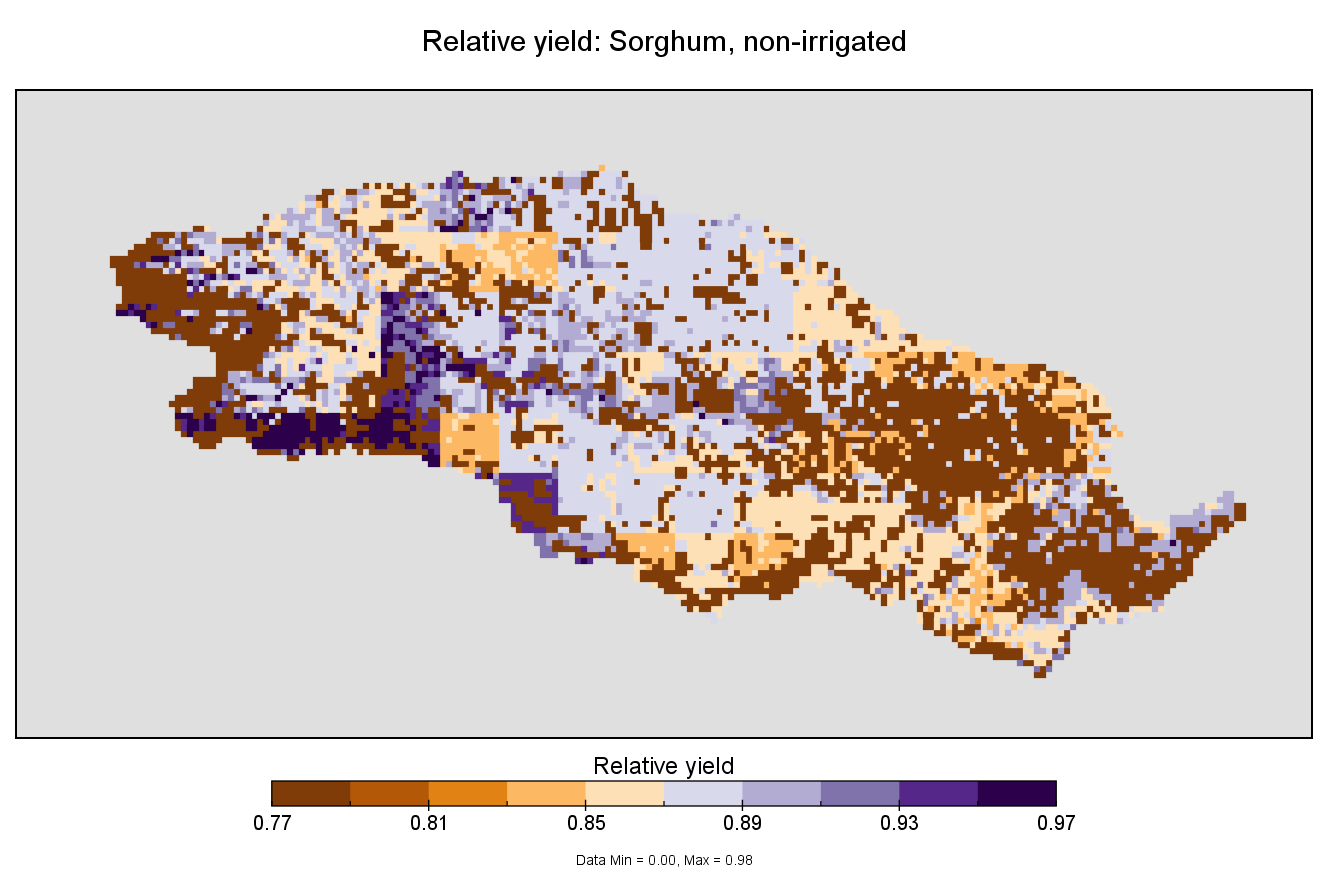

In [21]:
img = Image.open(photo_folder + '/relative_yield_sorghum.png')
img

## Reservoirs

Units are in m3, and represent the volumes of relevant reservoirs.

Here, we present the locations and names of the reservoirs of interest. 

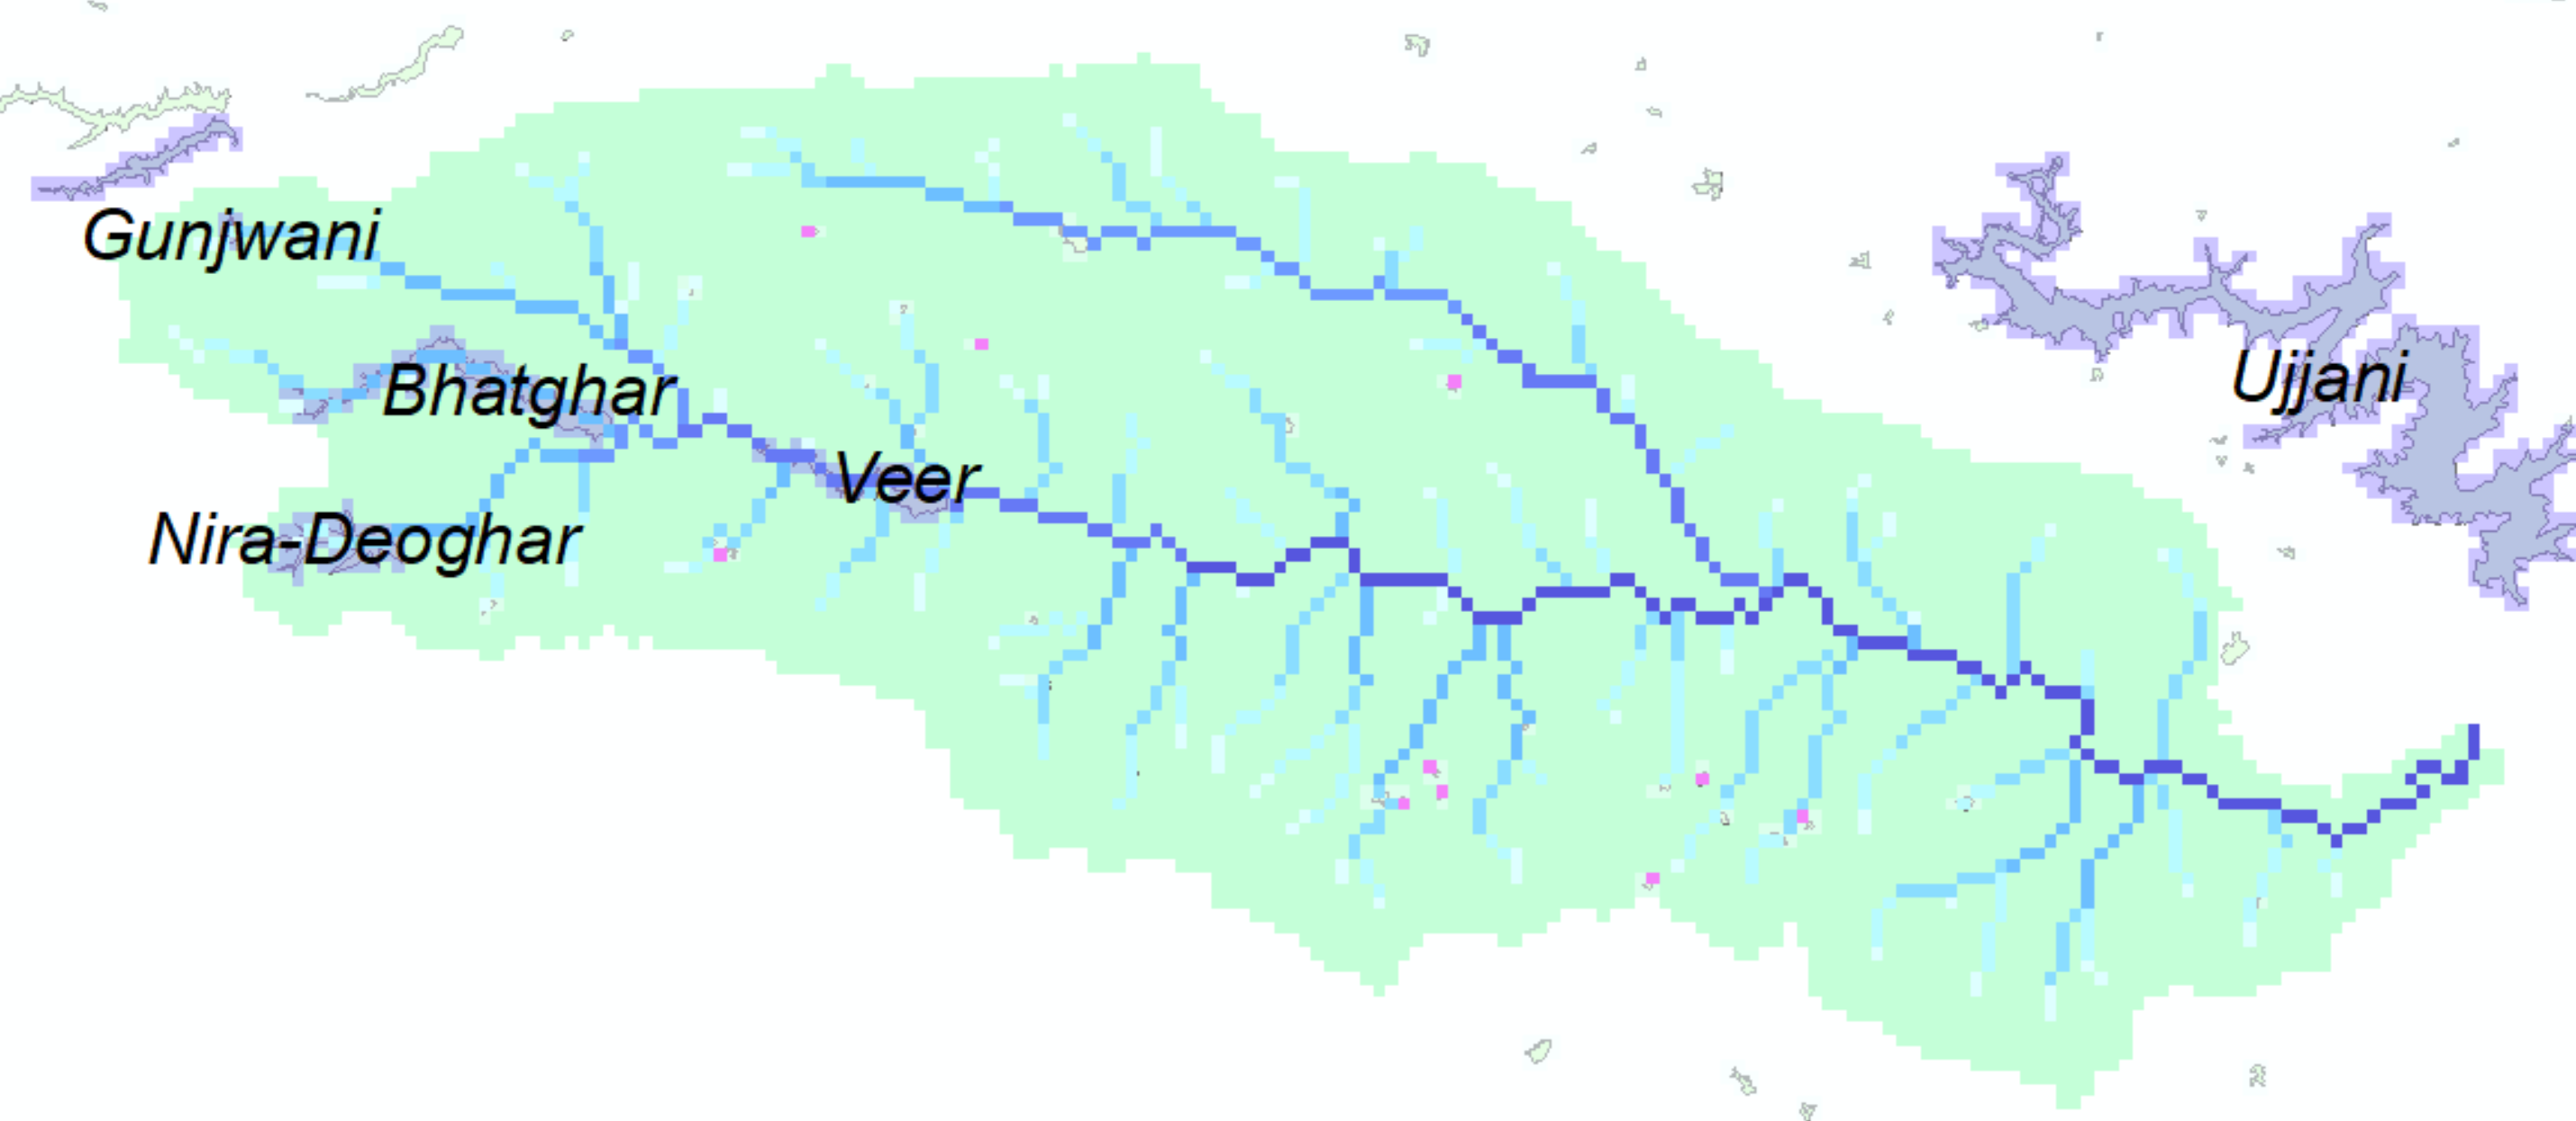

In [22]:
img = Image.open(photo_folder + '/reservoirs_onSarati.png')
img

In [23]:
Dam_names = ['Vir', 'Gunjvane', 'NiraDeoghar', 'Bhatghar']
Reservoirs_Sarati = Dam_names
Inds =  [(164,111), (143,55), (168,66), (159,84)]

Vars = [['lakeResStorage', 'Lake Level', 'Reservoir Volume', 'Volume (MCM)', 1000000.]]

SIMULATED_nc = []

for var in Vars:
    reservoir_nc_filename = output_folder +'/'+ var[0] + '_monthend.nc'
    SIMULATED_nc.append(Dataset(reservoir_nc_filename, 'r'))


In [24]:
DAMS = []

for i in range(len(Vars)): 
    Dams = []
    for inds in Inds:
        Dams.append(SIMULATED_nc[i].variables[Vars[i][0] + '_monthend'][:,inds[0], inds[1]]/Vars[i][4])
    DAMS.append(Dams)
    

In [25]:
for i in range(len(Vars)):
    
    fig = go.Figure()
    Dams = DAMS[i]
    
    for dam_i in range(len(Dams)):
        
        fig.add_trace(go.Scatter(y = Dams[dam_i],
                                 x = Dates_simulated,
                        mode='lines',
                        name=Dam_names[dam_i]))


    fig.update_layout(title = Vars[i][2] +', Simulated',
                           xaxis_title = 'Months',
                           yaxis_title = Vars[i][3])

    fig.show()

The following outputs may allow for easier input into Excel.

In [26]:
Dams = DAMS[0]

for dam_i in range(len(Dams)):
    print(Dam_names[dam_i])
    for seg in Dams: #[dam_i]:
        print(*seg, sep = ", ")
    print('\n')


Vir
147.0559, 161.5106, 170.4134, 172.41104, 175.16422, 102.770195, 236.83871, 177.01924, 201.97049, 195.03114, 207.02632, 169.33667, 170.15271, 169.07214, 157.46057, 127.35546, 90.35715, 131.55983, 278.3, 230.14384, 201.30087, 191.1313, 222.69795, 179.77113, 192.93468, 205.61926, 212.25932, 212.95163, 209.6218, 248.75851, 278.3, 243.47621, 182.96733, 130.78911, 163.75458, 175.32256, 177.99467, 179.74492, 165.66824, 132.65767, 107.21756, 133.03807, 238.29718, 247.16238, 213.67322, 197.39166, 248.97899, 196.76056, 214.37721, 227.79338, 233.0187, 226.82692, 232.52301, 226.59203, 240.98071, 203.15536, 236.83977, 190.7828, 193.12334, 156.54509, 161.67482, 161.62837, 153.36423, 123.5991, 108.18021, 108.8794, 185.9192, 181.36012, 139.43698, 109.80023, 105.22361, 83.59503, 97.13973, 100.06877, 96.16399, 83.748665, 72.60258, 94.86473, 210.47537, 196.36865, 219.06203, 151.96616, 159.24594, 120.346954, 120.50586, 113.42952, 94.46477, 71.16755, 45.044304, 127.87738, 159.34593, 214.86087, 159.3940

415.47284, 383.77933, 348.506, 315.2466, 285.6433, 266.74298, 468.72525, 499.65958, 541.74005, 538.09344, 502.56085, 465.45023, 429.39972, 395.4647, 359.0007, 324.90704, 291.5942, 298.34998, 525.2729, 569.84326, 544.6657, 544.1768, 508.504, 471.59818, 435.71063, 403.61664, 367.06442, 334.70972, 300.86172, 381.4105, 615.52386, 606.9891, 542.92175, 506.17853, 472.7643, 440.85245, 407.15796, 376.23776, 342.07416, 308.5145, 277.35886, 301.81412, 457.46188, 553.76587, 548.8602, 542.31195, 511.14093, 474.77057, 439.45184, 406.64877, 369.68585, 335.04617, 305.30643, 371.25427, 574.27844, 552.99164, 557.4647, 537.55884, 501.39044, 465.13202, 429.4735, 397.05188, 361.89047, 327.56277, 298.80435, 293.41388, 378.60098, 409.92258, 400.21027, 380.66516, 352.93417, 325.9553, 300.08374, 276.35895, 249.41478, 222.9485, 198.41016, 205.96806, 337.9805, 392.4662, 402.2911, 377.98117, 349.7686, 323.42166, 297.8157, 273.542, 246.32726, 222.42459, 196.69144, 239.52254, 305.54764, 493.59274, 498.14386, 461.4

## Groundwater

Units are in metres, and represent depth to groundwater. 

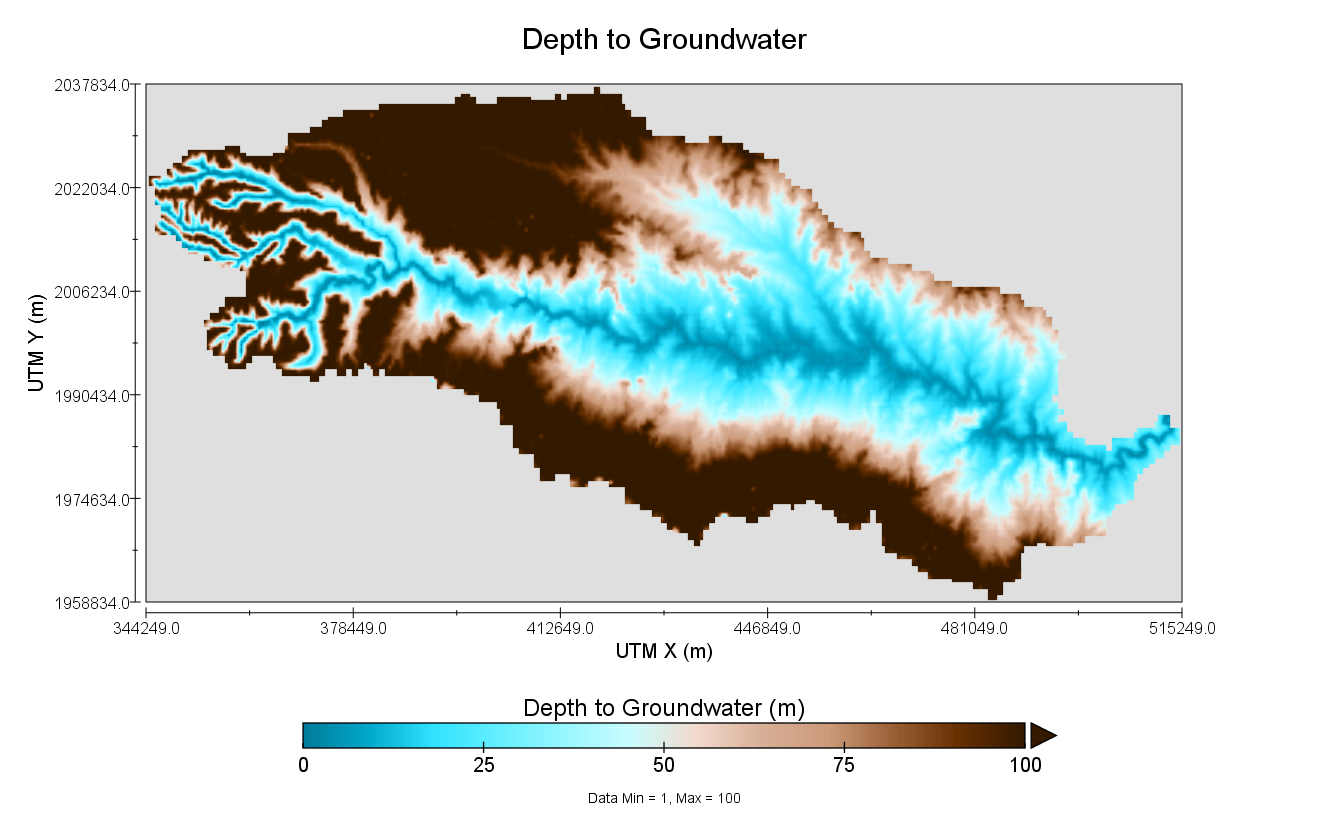

In [27]:
img = Image.open(photo_folder + '/depth_to_groundwater.png')
img